In [1]:
# Standard libraries
import xarray as xr
import numpy as np
import pandas as pd
# import os
# from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import iris
from iris.pandas import as_cubes
import sys
import math
import os
import glob
import gc

from datetime import datetime
from cartopy.util import add_cyclic_point
import gc
import imageio.v2
from IPython import display
# import netCDF4
from global_land_mask import globe
# # Import tobac itself:
import tobac

# Disable a few warnings:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/tobac/utils/internal.py:448: UserWarning: Numba not able to be imported; periodic boundary calculations will be slower.Exception raised: ModuleNotFoundError("No module named 'numba'")
  warnings.warn(
/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/tobac/utils/internal.py:448: UserWarning: Numba not able to be imported; periodic boundary calculations will be slower.Exception raised: ModuleNotFoundError("No module named 'numba'")
  warnings.warn(


In [2]:
%%time
path = '/glade/u/home/noteng/work/masters-research/data/'
file = 'march13-march14.nc'
data = xr.open_dataset(path+file)
data = data.sel(time=slice('2020-03-13T04:00:00.000000000', '2020-03-14T05:00:00.000000000'))
data.close()

CPU times: user 61.1 ms, sys: 21.9 ms, total: 83 ms
Wall time: 1.54 s


In [3]:
# equivalent_reflectivity_factor = data['equivalent_reflectivity_factor'][:,450:580,256:771] #Based on longitude and latitude of Andoya and Norwegian Sea
equivalent_reflectivity_factor = data['equivalent_reflectivity_factor'][:,250:650,450:850] #Based on longitude and latitude of Andoya and Norwegian Sea
# equivalent_reflectivity_factor = data['equivalent_reflectivity_factor'][:,330:580,660:780] #### hdm1 and hdm2
# equivalent_reflectivity_factor = data['equivalent_reflectivity_factor']
equivalent_reflectivity_factor

<xarray.DataArray 'equivalent_reflectivity_factor' (time: 301, Yc: 400, Xc: 400)>
[48160000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14T05:00:00
  * Xc       (Xc) float32 -8.3e+04 -8.2e+04 -8.1e+04 ... 3.15e+05 3.16e+05
  * Yc       (Yc) float32 -2.06e+06 -2.061e+06 ... -2.458e+06 -2.459e+06
    lon      (Yc, Xc) float32 ...
    lat      (Yc, Xc) float32 ...
Attributes:
    standard_name:  equivalent_reflectivity_factor
    long_name:      Radar Reflectivity
    units:          dBZ
    grid_mapping:   projection_lambert

In [4]:
# load Mask_ERF_files
Mask_ERF = iris.load('../saved-files/threshold-all/Mask_ERF_iris-all-all.nc')[0]
Mask_ERF

<iris 'Cube' of segmentation_mask / (1) (time: 301; -- : 400; -- : 400)>

In [5]:
final_tracks = pd.read_csv('../saved-files/threshold-all/cells-allkm-KAZR-thres-all-all.csv')
final_tracks

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude,cell,time_cell,distance,mean dBZ,max dBZ,area($km^2$),cloud_id
0,0,453,121.000000,324.705104,2,0,5,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.181000e+06,241705.104259,70.248601,16.323888,5,0 days 00:00:00,125.680339,13.245867,34.567482,132.310998,1
1,0,456,135.877490,273.231217,7,0,6,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.195877e+06,190231.216954,70.159887,14.951233,6,0 days 00:00:00,116.846876,13.245867,34.567482,331.269006,2
2,0,471,168.000000,286.000000,1,0,10,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.228000e+06,203000.000000,69.858376,15.206022,10,0 days 00:00:00,81.936672,13.245867,34.567482,65.658469,3
3,0,481,203.473824,247.478730,4,0,13,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.263474e+06,164478.729588,69.565035,14.156179,13,0 days 00:00:00,76.275220,13.245867,34.567482,327.324894,4
4,0,482,204.000000,286.176995,2,0,14,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.264000e+06,203176.994856,69.531731,15.128128,14,0 days 00:00:00,48.610059,13.245867,34.567482,171.124975,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55639,300,555,178.000000,358.012383,2,20,66372,2020-03-14 05:00:00,2020-03-14 05:00:00,-2.238000e+06,275012.383147,69.698076,17.005561,15276,0 days 00:10:00,80.687235,14.702386,40.106802,208.928144,7117
55640,300,575,285.000000,350.000000,1,20,66383,2020-03-14 05:00:00,2020-03-14 05:00:00,-2.345000e+06,267000.000000,68.738228,16.495682,15277,0 days 00:10:00,55.407771,14.702386,40.106802,214.931734,7118
55641,300,576,286.727785,374.604901,6,20,66384,2020-03-14 05:00:00,2020-03-14 05:00:00,-2.346728e+06,291604.900654,68.696045,17.083278,15278,0 days 00:10:00,74.819683,14.702386,40.106802,494.549355,7119
55642,300,539,295.648140,392.416781,10,15,66361,2020-03-14 05:00:00,2020-03-14 05:00:00,-2.355648e+06,309416.781206,68.594721,17.483020,15279,0 days 00:10:00,94.427981,14.702386,40.106802,115.430654,7120


In [6]:
final_tracks.columns

Index(['frame', 'idx', 'hdim_1', 'hdim_2', 'num', 'threshold_value', 'feature',
       'time', 'timestr', 'projection_y_coordinate', 'projection_x_coordinate',
       'latitude', 'longitude', 'cell', 'time_cell', 'distance', 'mean dBZ',
       'max dBZ', 'area($km^2$)', 'cloud_id'],
      dtype='object')

In [7]:
final_tracks['threshold_value'].min()

-25

In [8]:
tracks = final_tracks.copy()

In [9]:
tracks['latitude'].max(), tracks['latitude'].min(), tracks['longitude'].max(), tracks['longitude'].min()

(71.33576965332031, 67.66639161956176, 18.721080780029297, 7.982349872589111)

In [10]:
# original one for powerpoint presentation
# mask_longitude = (tracks['longitude'] >= 13) & (tracks['longitude'] <= 16.5)
# mask_latitude = (tracks['latitude'] >= 69) & (tracks['latitude'] <= 70.5)

# tracks = tracks[(mask_longitude) & (mask_latitude)]
# tracks

# for poster defense
mask_longitude = (tracks['longitude'] >= 14.7) & (tracks['longitude'] <= 16.2)
mask_latitude = (tracks['latitude'] >= 69) & (tracks['latitude'] <= 69.6)

tracks = tracks[(mask_longitude) & (mask_latitude)]
tracks

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude,cell,time_cell,distance,mean dBZ,max dBZ,area($km^2$),cloud_id
4,0,482,204.000000,286.176995,2,0,14,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.264000e+06,203176.994856,69.531731,15.128128,14,0 days 00:00:00,48.610059,13.245867,34.567482,171.124975,5
5,0,484,215.225348,305.314223,27,0,15,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.275225e+06,222314.222575,69.413646,15.580704,15,0 days 00:00:00,30.556078,13.245867,34.567482,268.633124,6
6,0,487,226.012197,289.403132,11,0,16,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.286012e+06,206403.131751,69.329361,15.159224,16,0 days 00:00:00,29.426706,13.245867,34.567482,139.293508,7
10,0,495,241.400659,283.483967,3,0,20,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.301401e+06,200483.967213,69.194434,14.978689,20,0 days 00:00:00,28.538100,13.245867,34.567482,154.220238,11
11,0,497,246.003187,277.408211,23,0,21,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.306003e+06,194408.211342,69.157367,14.818941,21,0 days 00:00:00,34.323444,13.245867,34.567482,249.738941,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55441,298,518,213.890009,287.436573,5,20,66168,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.273890e+06,204436.573049,69.440972,15.137427,15029,0 days 00:50:00,39.668953,15.301029,39.603226,112.426276,7019
55449,298,526,255.898209,321.518997,5,20,66171,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.315898e+06,238518.997389,69.030065,15.880274,15099,0 days 00:40:00,14.659902,15.301029,39.603226,561.179934,7047
55485,298,517,208.713671,289.620424,13,20,66167,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.268714e+06,206620.424262,69.486141,15.203790,15247,0 days 00:05:00,42.751409,15.301029,39.603226,376.085142,7104
55557,299,523,209.000000,291.000000,1,25,66281,2020-03-14 04:55:00,2020-03-14 04:55:00,-2.269000e+06,208000.000000,69.482399,15.237685,15247,0 days 00:10:00,41.801826,15.240493,41.116443,328.328799,7104


In [11]:
tracks['latitude'].max(), tracks['latitude'].min(), tracks['longitude'].max(), tracks['longitude'].min()

(69.59994506835938, 69.00004766466081, 16.199923513291605, 14.702135714237736)

In [12]:
tracks = tracks[tracks['distance'] <= 60]
tracks = tracks.reset_index(drop=True)
tracks

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude,cell,time_cell,distance,mean dBZ,max dBZ,area($km^2$),cloud_id
0,0,482,204.000000,286.176995,2,0,14,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.264000e+06,203176.994856,69.531731,15.128128,14,0 days 00:00:00,48.610059,13.245867,34.567482,171.124975,5
1,0,484,215.225348,305.314223,27,0,15,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.275225e+06,222314.222575,69.413646,15.580704,15,0 days 00:00:00,30.556078,13.245867,34.567482,268.633124,6
2,0,487,226.012197,289.403132,11,0,16,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.286012e+06,206403.131751,69.329361,15.159224,16,0 days 00:00:00,29.426706,13.245867,34.567482,139.293508,7
3,0,495,241.400659,283.483967,3,0,20,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.301401e+06,200483.967213,69.194434,14.978689,20,0 days 00:00:00,28.538100,13.245867,34.567482,154.220238,11
4,0,497,246.003187,277.408211,23,0,21,2020-03-13 04:00:00,2020-03-13 04:00:00,-2.306003e+06,194408.211342,69.157367,14.818941,21,0 days 00:00:00,34.323444,13.245867,34.567482,249.738941,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,298,518,213.890009,287.436573,5,20,66168,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.273890e+06,204436.573049,69.440972,15.137427,15029,0 days 00:50:00,39.668953,15.301029,39.603226,112.426276,7019
2964,298,526,255.898209,321.518997,5,20,66171,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.315898e+06,238518.997389,69.030065,15.880274,15099,0 days 00:40:00,14.659902,15.301029,39.603226,561.179934,7047
2965,298,517,208.713671,289.620424,13,20,66167,2020-03-14 04:50:00,2020-03-14 04:50:00,-2.268714e+06,206620.424262,69.486141,15.203790,15247,0 days 00:05:00,42.751409,15.301029,39.603226,376.085142,7104
2966,299,523,209.000000,291.000000,1,25,66281,2020-03-14 04:55:00,2020-03-14 04:55:00,-2.269000e+06,208000.000000,69.482399,15.237685,15247,0 days 00:10:00,41.801826,15.240493,41.116443,328.328799,7104


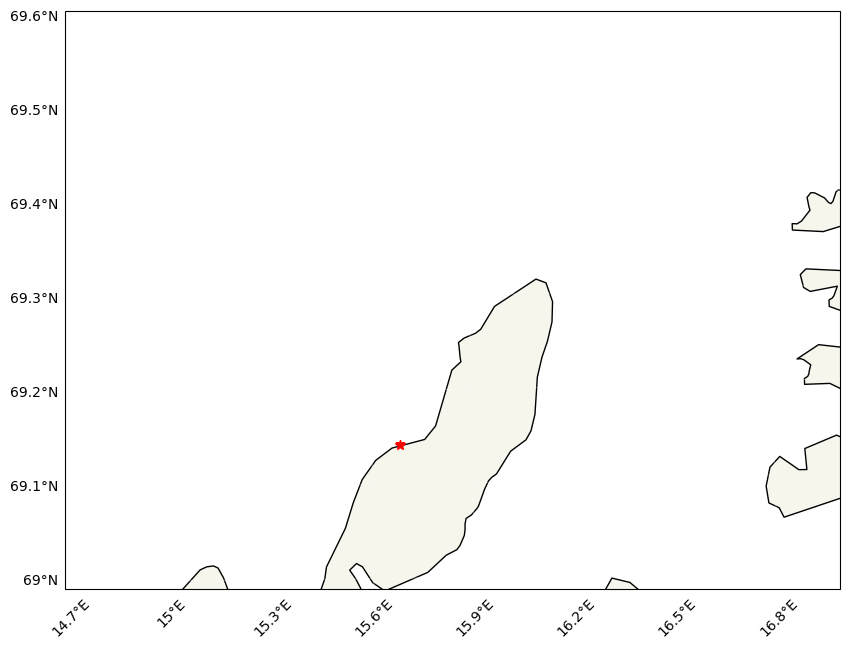

In [13]:
latA = 69.141281 #latitude of COMBLE site
lonA = 15.684166-1 #longitude of COMBLE site -1
xm, ym = 6,2.75 # extent from center point in lon and lat

fig, ax = plt.subplots(1,1,figsize=(10,9),subplot_kw={'projection': ccrs.Orthographic(lonA,latA)})
# xm, ym = 6,2.75 # extent from center point in lon and lat

# extent = (lonA-xm, lonA+xm, latA-ym, latA+ym) # define extent map
# extent = (lonA-xm+6.5, lonA+xm-4.7, latA-ym+2.6, latA+ym-1.5) # define extent map
extent = (lonA-xm+6, lonA+xm-3.7, latA-ym+2.6, latA+ym-2.3) # define extent map #1
ax.set_extent(extent) # set extent of map
ax.coastlines(resolution='10m', color='black') # plot coastlines with high resolution: 10m
ax.set_facecolor('white')
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=0.5)

# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3, color='white'); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'}
ax.plot(lonA+1,latA, color='red', marker='*', markersize = 7.5,transform=ccrs.PlateCarree()) # plot red star at location of Andenes

In [14]:
unique_cell_ids = np.unique(tracks['cell'].values)
unique_cell_ids

array([   14,    15,    16,    19,    20,    21,    41,    51,    52,
         121,   123,   125,   136,   137,   146,   205,   211,   214,
         219,   227,   274,   336,   353,   411,   412,   429,   430,
         431,   447,   451,   452,   490,   499,   511,   530,   676,
         712,   755,   763,   765,   766,   768,   781,   784,   829,
         938,   943,   959,   961,  1003,  1004,  1067,  1118,  1159,
        1160,  1161,  1180,  1229,  1252,  1255,  1267,  1351,  1353,
        1356,  1389,  1393,  1417,  1433,  1497,  1502,  1516,  1581,
        1638,  1701,  1739,  1762,  1776,  1778,  1842,  1843,  1927,
        1938,  2032,  2077,  2174,  2178,  2222,  2266,  2344,  2406,
        2411,  2412,  2467,  2587,  2602,  2621,  2624,  2690,  2776,
        2778,  2790,  2926,  2954,  2976,  2977,  3086,  3137,  3206,
        3244,  3245,  3247,  3325,  3356,  3362,  3370,  3390,  3402,
        3405,  3423,  3424,  3433,  3570,  3571,  3608,  3704,  3758,
        3797,  3815,

In [15]:
len(unique_cell_ids)

628

In [16]:
%%time
# all masked cell in iris cube
masked_tracked_cell = []
for i, unique_value in enumerate(unique_cell_ids):
    # get masked cell based on cell id
    get_mask_cell = tobac.utils.mask_cell(mask=Mask_ERF, cell=unique_value, track=tracks, masked=False) 
    masked_tracked_cell.append(get_mask_cell)

CPU times: user 1.62 s, sys: 9.36 ms, total: 1.63 s
Wall time: 1.69 s


In [17]:
%%time
# Convert the segmented/mask cells from iris cube to xrray
masked_values_to_xarray = []
for i, items in enumerate(masked_tracked_cell):
    mask_convert_xr = xr.DataArray.from_iris(masked_tracked_cell[i]) # convert iris cube to xarray data array
    masked_values_to_xarray.append(mask_convert_xr) # append the results to list
    # print(mask_convert_xr)

CPU times: user 6.17 s, sys: 2.12 s, total: 8.28 s
Wall time: 9.37 s


In [18]:
%%time
def all_kazr_cells(start_time:str, end_time:str, CAO_date:str, folder_name:str, gif_name:str):
    """Generate a GIF animation of all cells within a given time range.

    Parameters:
        start_time (str): The start time of the animation in the format '"%H:%M:%S %d %b %Y".'.
        end_time (str): The end time of the animation in the format '"%H:%M:%S %d %b %Y".'.
        CAO_date(str): The times of CAO.
        folder_name (str): The name of the folder containing the cell data.
        name_of_gif (str): The desired name for the generated GIF file.

    Returns:
        animation of cell"""
    
        
    # read track files
    # tracks = pd.read_csv('../saved-files/threshold-all/cells-allkm-KAZR-thres-all-all.csv')
    # converting time object to datetime format
    tracks['time'] = pd.to_datetime(tracks['time'])
    tracks['timestr'] = pd.to_datetime(tracks['timestr'])
#     
    # mask the start and end time
    mask_date = (tracks['timestr'] >= start_time) & (tracks['timestr'] <= end_time)
    cell1 = tracks[(mask_date)].reset_index(drop=True)
    
    # get unique values
    idx = np.unique(cell1['cell'].values)
    
    # get all masked cell and convert to xarray
    convert_alls = []
    for ii, cell_id in enumerate(idx):
        # mask in iris cube
        mask_cell_all = tobac.utils.mask_cell(Mask_ERF, cell_id, tracks)
        # convert to xarray dataarray
        convert_all = xr.DataArray.from_iris(mask_cell_all)
        convert_alls.append(convert_all)
        
        
    
    # plots
    loop_over = cell1['frame'].values[:]
    cells = cell1['cell'].values[:]
    for ind, i in enumerate(loop_over):
        latA = 69.141281 #latitude of COMBLE site
        lonA = 15.684166-1 #longitude of COMBLE site -1
        xm, ym = 6,2.75 # extent from center point in lon and lat

        fig, ax = plt.subplots(1,1,figsize=(10,9),subplot_kw={'projection': ccrs.Orthographic(lonA,latA)})
        # xm, ym = 6,2.75 # extent from center point in lon and lat

        # extent = (lonA-xm, lonA+xm, latA-ym, latA+ym) # define extent map
        # extent = (lonA-xm+3.3, lonA+xm-3.7, latA-ym+2, latA+ym-1.5) # define extent map
       
    # extent = (lonA-xm+4.5, lonA+xm-3.7, latA-ym+2.6, latA+ym-1.5) # define extent map
    
        extent = (lonA-xm+6, lonA+xm-3.7, latA-ym+2.6, latA+ym-2.3) # define extent map #1
        # extent = (lonA-xm+6.4, lonA+xm-4.8, latA-ym+2.6, latA+ym-2.5) # define extent map
        ax.set_extent(extent) # set extent of map
        ax.coastlines(resolution='10m', color='black') # plot coastlines with high resolution: 10m
        ax.set_facecolor('white')
        ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=0.5)

        # add grid lines
        gl = ax.gridlines(x_inline=False, alpha=0.3, color='white'); gl.bottom_labels=True; gl.left_labels=True
        gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'}
       
        #############################
        # loop through cell-id
        for cell_idx in range(0, len(idx)):
            # change time to moth, day, year, hours and minutes
            dt = masked_values_to_xarray[cell_idx]['time'].dt.strftime('%m-%d-%Y %H:%M').values  ### array 
            dt_saved_files_format = masked_values_to_xarray[cell_idx]['time'].dt.strftime('%m-%d-%Y %H_%M').values  ### array 

             # fill in the place where there is cloud with 1 and place with no cloud to be zero
            cloud = np.asarray(convert_alls[cell_idx][i], dtype='float')
            invalid_cloud = np.greater(cloud, 0)
            cloud[invalid_cloud] = 1
            invalid_cloud1 = np.less(cloud, 1)
            cloud[invalid_cloud1] = np.nan


            cs=ax.pcolormesh(convert_alls[cell_idx]['lon'],
                        convert_alls[cell_idx]['lat'], 
                        # cloud*equivalent_reflectivity_factor.values[i],
                        cloud*equivalent_reflectivity_factor.values[i],
                        cmap='nipy_spectral',
                        transform=ccrs.PlateCarree(),
                        vmin=-30,
                        vmax=30)
            

             # display each id on cell
            frame = cell1[cell1['frame']==i]
            longi = frame['longitude'].values[:]
            lati = frame['latitude'].values[:]
            areas = frame['area($km^2$)'].values[:]
            cell_id = frame['cell'].values[:]
            cloud_id = frame['cloud_id'].values[:]
            hdim1 = frame['hdim_1'].values[:]
            hdim2 = frame['hdim_2'].values[:]

            #     # check if area has value of nan
            # if not math.isnan(frame['area($km^2$)'].values[0]):
                # for lo, la, ce, are in zip(all_long, all_lat, all_idx, all_area):
            for lon, lat, cell_ids, cloud_ids , area, h1, h2 in zip(longi, lati, cell_id, cloud_id, areas, hdim1, hdim2):
                fontdict={'fontweight': 'extra bold'}
                ax.text(lon, lat, cell_ids, transform=ccrs.PlateCarree(), fontsize=16, color='black', fontdict=fontdict)


        ax.plot(lonA+1,latA, color='red', marker='*', markersize = 7.5,transform=ccrs.PlateCarree()) # plot red star at location of Andenes
        ax.set_title(f"Nordic Radar Mosaic: {dt[i]} UTC", fontweight='bold', fontsize=16.5, pad=11)  # title of figure
        


        # Add a colorbar axis at the right of the graph
        # cbar_ax = fig.add_axes([0.85, 0.11, 0.047, 0.77]) #lbwh
        cbar_ax = fig.add_axes([0.91, 0.175, 0.047, 0.64]) #lbwh #1
       

        cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
        cbar.set_label("Reflectivity Factor [dBZ]", fontsize = 15)
        
        # Specify the directory and file name
        directory = f'./FinalFigures/{CAO_date}/{folder_name}/'
        # file_name = f'{dt[i]}.png'
        file_name = f'{dt_saved_files_format[i]}.png'
        
        # Create the directory if it doesn't exist
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(f"Directory '{directory}' created successfully.")

            

    
        # save figure
        # fig.savefig(os.path.join(directory, file_name), dpi=300)
        # plt.close()
        
        dirr = sorted(os.listdir(directory))
        if f'{dt[i]}.png' in dirr:
            # print(f'{dt[i]}.png already exist')
            pass
            plt.close()
        else:
            fig.savefig(os.path.join(directory, file_name), dpi=350, bbox_inches='tight')
            plt.close()
            gc.collect()  # Explicitly trigger garbage collection to release memory
    print('\U0001f600\U0001f600\U0001f600\U0001f600EXECUTION DONE!!!\U0001f600\U0001f600\U0001f600\U0001f600')
    # gc.collect()

        
        
    # build gif
    
    imgs = sorted(glob.glob(f"{directory}/*png"))
    with imageio.get_writer(f"{directory}/{gif_name}.gif", mode='I', duration=0.7) as writer:
        for filename in imgs:
            image = imageio.v2.imread(filename)
            writer.append_data(image)
    print(f"Figures in {folder_name} executed!")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


In [19]:
# %%time
# one = all_kazr_cells(start_time="12:03:08 13 Mar 2020", end_time="12:38:04 13 Mar 2020", 
#                 CAO_date='try',
#                 folder_name='cell10', 
#                 gif_name='cell-id3')
# one

In [20]:
# Data containing the ID, start date, and end date
# kazr_cell_time = [
#     # (1, "08:12:28 13 Mar 2020", "09:06:36 13 Mar 2020"),
#     # (2, "09:12:48 13 Mar 2020", "09:58:16 13 Mar 2020"),
#     # (3, "10:00:12 13 Mar 2020", "10:11:56 13 Mar 2020"),
#     # (4, "10:14:32 13 Mar 2020", "10:29:00 13 Mar 2020"),
#     # (5, "10:22:40 13 Mar 2020", "10:46:56 13 Mar 2020"),
#     # (6, "10:42:32 13 Mar 2020", "10:59:04 13 Mar 2020"),
#     # (7, "11:00:32 13 Mar 2020", "11:32:28 13 Mar 2020"),
#     # (8, "11:30:44 13 Mar 2020", "11:51:52 13 Mar 2020"),
#     # (9, "11:48:08 13 Mar 2020", "12:09:04 13 Mar 2020"),
#     # (10, "12:03:08 13 Mar 2020", "12:38:04 13 Mar 2020"), # done
#     # (11, "12:32:48 13 Mar 2020", "13:14:32 13 Mar 2020"),
#     # (12, "13:53:00 13 Mar 2020", "14:05:16 13 Mar 2020"),
#     # (13, "14:03:28 13 Mar 2020", "14:31:20 13 Mar 2020"), # done
#     # (14, "15:09:36 13 Mar 2020", "15:45:20 13 Mar 2020"),
#     # (15, "15:48:00 13 Mar 2020", "16:12:44 13 Mar 2020"),
#     # (16, "16:12:00 13 Mar 2020", "16:33:44 13 Mar 2020"),
#     # (17, "16:29:40 13 Mar 2020", "16:38:20 13 Mar 2020"),
#     # (18, "16:44:24 13 Mar 2020", "17:13:32 13 Mar 2020"),
#     # (19, "17:12:56 13 Mar 2020", "17:45:48 13 Mar 2020"),
#     # (20, "18:10:04 13 Mar 2020", "18:28:04 13 Mar 2020"),
#     # (21, "18:27:28 13 Mar 2020", "18:50:04 13 Mar 2020"),
#     # (22, "19:15:32 13 Mar 2020", "19:54:00 13 Mar 2020"),
#     # (23, "19:47:12 13 Mar 2020", "20:15:52 13 Mar 2020"),
#     # (24, "20:14:12 13 Mar 2020", "20:48:12 13 Mar 2020"),
#     (25, "20:48:36 13 Mar 2020", "21:21:40 13 Mar 2020"),
#     (26, "21:27:40 13 Mar 2020", "21:50:48 13 Mar 2020"),
#     # (27, "21:48:20 13 Mar 2020", "22:13:00 13 Mar 2020"),
#     # (28, "22:28:24 13 Mar 2020", "23:00:00 13 Mar 2020"),
#     # (29, "23:38:56 13 Mar 2020", "00:16:28 14 Mar 2020"),
#     # (30, "00:13:24 14 Mar 2020", "00:30:44 14 Mar 2020"),
#     # (31, "01:06:40 14 Mar 2020", "01:24:08 14 Mar 2020"),
#     # (32, "02:19:20 14 Mar 2020", "02:34:36 14 Mar 2020"),
#     # (33, "02:43:24 14 Mar 2020", "03:12:44 14 Mar 2020"),
#     # (34, "03:17:16 14 Mar 2020", "03:41:20 14 Mar 2020"),
#     # (35, "03:57:16 14 Mar 2020", "04:31:56 14 Mar 2020"),
#     # (36, "04:27:40 14 Mar 2020", "04:50:20 14 Mar 2020"),
#     # (37, "04:49:56 14 Mar 2020", "05:19:48 14 Mar 2020")
# ]
kazr_cell_time = [
    # (1, '08:12:28 13 Mar 2020', '08:34:48 13 Mar 2020'),
    # (2, '08:32:08 13 Mar 2020', '09:06:36 13 Mar 2020'),
    # (3, '09:12:48 13 Mar 2020', '09:31:00 13 Mar 2020'),
    # (4, '09:29:36 13 Mar 2020', '09:58:16 13 Mar 2020'),
    # (5, '10:00:12 13 Mar 2020', '10:11:56 13 Mar 2020'),
    # (6, '10:14:32 13 Mar 2020', '10:29:00 13 Mar 2020'),
    # (7, '10:22:40 13 Mar 2020', '10:46:56 13 Mar 2020'),
    # (8, '10:42:32 13 Mar 2020', '10:59:04 13 Mar 2020'),
    # (9, '11:00:32 13 Mar 2020', '11:26:20 13 Mar 2020'),
    # (10, '11:23:32 13 Mar 2020', '11:32:28 13 Mar 2020'),
    # (11, '11:30:44 13 Mar 2020', '11:51:52 13 Mar 2020'),
    # (12, '11:48:08 13 Mar 2020', '12:09:04 13 Mar 2020'),
    # (13, '12:03:08 13 Mar 2020', '12:15:00 13 Mar 2020'),
    # (14, '12:12:24 13 Mar 2020', '12:38:04 13 Mar 2020'),
    # (15, '12:32:48 13 Mar 2020', '12:56:36 13 Mar 2020'),
    # (16, '12:52:56 13 Mar 2020', '13:14:32 13 Mar 2020'),
    # (17, '13:53:00 13 Mar 2020', '14:05:16 13 Mar 2020'),
    # (18, '14:03:28 13 Mar 2020', '14:31:20 13 Mar 2020'),
    # (19, '15:09:36 13 Mar 2020', '15:19:08 13 Mar 2020'),
    # (20, '15:17:16 13 Mar 2020', '15:45:20 13 Mar 2020'),
    # (21, '15:54:36 13 Mar 2020', '15:58:08 13 Mar 2020'),
    # (22, '15:58:12 13 Mar 2020', '16:02:36 13 Mar 2020'),
    # (23, '15:48:00 13 Mar 2020', '16:12:44 13 Mar 2020'),
    # (24, '16:12:00 13 Mar 2020', '16:33:44 13 Mar 2020'),
    # (25, '16:29:40 13 Mar 2020', '16:38:20 13 Mar 2020'),
    # (26, '16:44:24 13 Mar 2020', '16:57:56 13 Mar 2020'),
    # (27, '16:53:20 13 Mar 2020', '17:13:32 13 Mar 2020'),
    # (28, '17:12:56 13 Mar 2020', '17:22:56 13 Mar 2020'),
    # (29, '17:13:36 13 Mar 2020', '17:45:48 13 Mar 2020'),
    # (30, '18:10:04 13 Mar 2020', '18:28:04 13 Mar 2020'),
    # (31, '18:27:28 13 Mar 2020', '18:50:04 13 Mar 2020'),
    # (32, '18:47:08 13 Mar 2020', '18:54:48 13 Mar 2020'),
    # (33, '18:54:04 13 Mar 2020', '18:57:08 13 Mar 2020'),
    # (34, '19:15:32 13 Mar 2020', '19:54:00 13 Mar 2020'),
    # (35, '19:47:12 13 Mar 2020', '20:15:52 13 Mar 2020'),
    # (36, '20:14:12 13 Mar 2020', '20:32:32 13 Mar 2020'),
    # (37, '20:26:44 13 Mar 2020', '20:48:12 13 Mar 2020'),
    # (38, '20:50:16 13 Mar 2020', '20:59:28 13 Mar 2020'),
    # (39, '20:48:36 13 Mar 2020', '21:19:56 13 Mar 2020'),
    # (40, '21:07:00 13 Mar 2020', '21:11:04 13 Mar 2020'),
    # (41, '21:16:00 13 Mar 2020', '21:21:40 13 Mar 2020'),
    # (42, '21:27:40 13 Mar 2020', '21:50:48 13 Mar 2020'),
    # (43, '21:48:20 13 Mar 2020', '21:59:08 13 Mar 2020'),
    # (44, '21:57:40 13 Mar 2020', '22:13:00 13 Mar 2020'),
    # (45, '22:28:24 13 Mar 2020', '22:39:36 13 Mar 2020'),
    (46, '22:38:08 13 Mar 2020', '23:00:00 13 Mar 2020'),
    (47, '23:38:56 13 Mar 2020', '00:16:28 14 Mar 2020'),
    (48, '00:13:24 14 Mar 2020', '00:30:44 14 Mar 2020'),
    (49, '01:06:40 14 Mar 2020', '01:24:08 14 Mar 2020'),
    (50, '02:19:20 14 Mar 2020', '02:34:36 14 Mar 2020'),
    (51, '02:43:24 14 Mar 2020', '03:00:44 14 Mar 2020'),
    (52, '03:17:16 14 Mar 2020', '03:37:04 14 Mar 2020'),
    (53, '03:33:36 14 Mar 2020', '03:41:20 14 Mar 2020'),
    (54, '03:57:16 14 Mar 2020', '04:18:04 14 Mar 2020'),
    (55, '04:12:56 14 Mar 2020', '04:31:56 14 Mar 2020'),
    (56, '04:27:40 14 Mar 2020', '04:50:20 14 Mar 2020'),
    (57, '04:49:56 14 Mar 2020', '05:19:48 14 Mar 2020'),
]

In [21]:
%%time
for i in kazr_cell_time:
    # extract variables
    kazr_id, kazr_start_time, kazr_end_time = int(i[0]), i[1], i[2]
    ## display images and animations for all track-cells for March 13 and March 14
    # plt.text(lonA, latA, f"ID-{kazr_id}", transform=ccrs.PlateCarree(), fontsize=10)
    all_kazr_cells(start_time=kazr_start_time, 
                   end_time=kazr_end_time,
                   CAO_date="Mar-13 & Mar-14",
                  folder_name=f'ID-{kazr_id}', 
                 gif_name=f'ID-{kazr_id}')

Directory './FinalFigures/Mar-13 & Mar-14/ID-46/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-46 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-47/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-47 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-48/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-48 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-49/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-49 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-50/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-50 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-51/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-51 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-52/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-52 executed!
Directory './FinalFigures/Mar-13 & Mar-14/ID-53/' created successfully.
😀😀😀😀EXECUTION DONE!!!😀😀😀😀
Figures in ID-53 executed!
